In [1]:
#q0
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['price'] = data['target']
df['price'] = df['price']*100000
df['MedInc'] = df['MedInc']*10000
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,83252.0,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,83014.0,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,72574.0,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,56431.0,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,38462.0,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0
...,...,...,...,...,...,...,...,...,...
20635,15603.0,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,78100.0
20636,25568.0,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,77100.0
20637,17000.0,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,92300.0
20638,18672.0,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,84700.0


In [2]:
#q1

MedVal = df.groupby(['Latitude','Longitude'])[['price']].median()
MedVal = MedVal.reset_index()
df = pd.merge(df, MedVal, how='inner', on=['Latitude','Longitude'])
df.columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'price', 'MedVal']
x = df['Longitude']
y = df['Latitude']
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price,MedVal
0,83252.0,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0,452600.0
1,83014.0,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0,358500.0
2,72574.0,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0,371600.0
3,49643.0,37.0,7.106383,1.148936,98.0,2.085106,37.85,-122.24,335000.0,371600.0
4,72354.0,52.0,7.117166,0.994550,901.0,2.455041,37.85,-122.24,391100.0,371600.0
...,...,...,...,...,...,...,...,...,...,...
20635,15603.0,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,78100.0,78100.0
20636,25568.0,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,77100.0,77100.0
20637,17000.0,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,92300.0,92300.0
20638,18672.0,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,84700.0,84700.0


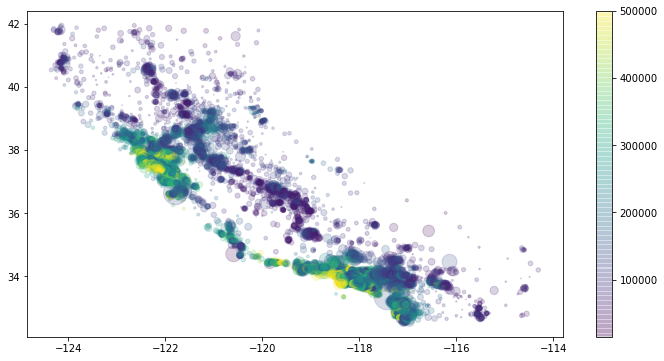

In [3]:
fig, ax = plt.subplots(figsize=(12,6))
scatdat = ax.scatter(x,y,
           c = df['MedVal'],
           sizes = df['Population']/50,
           alpha = 0.2)
plt.colorbar(scatdat,ax=ax)

In [54]:
# q2
df.describe()
#fig, ax = plt.subplots(figsize=(12,6))
#ax.plot(df['price'])
#ax.plot(df['AveRooms'])
#ax.plot(df['AveBedrms'])
#we see that the minimum amount of ave rooms and ave bedrooms are below 1 which are perhaps integrity issues
#we also see maximums of 141.91 ave rooms and 34.1 ave bedrooms


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price,MedVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,38706.710029,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,206855.816909,206520.726550
std,18998.217179,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,115395.615874,113224.493836
min,4999.000000,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,14999.000000,14999.000000
25%,25634.000000,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,119600.000000,121375.000000
50%,35348.000000,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,179700.000000,181250.000000
75%,47432.500000,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,264725.000000,263025.000000
max,150001.000000,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,500001.000000,500001.000000


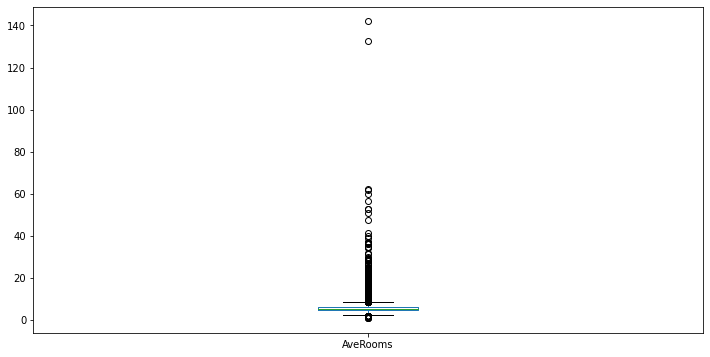

In [6]:
#q3
fig, ax = plt.subplots(figsize=(12,6))
df['AveRooms'].plot.box()



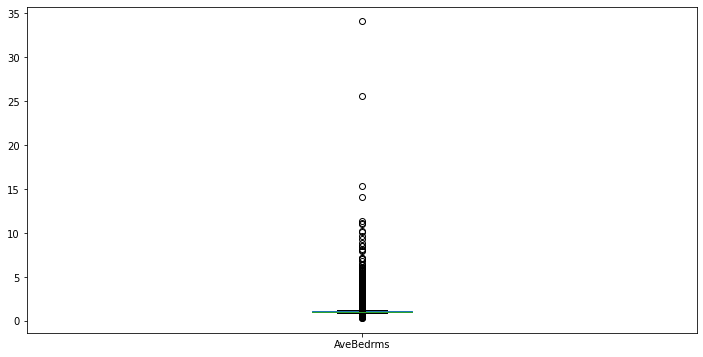

In [7]:
fig, ax = plt.subplots(figsize=(12,6))
df['AveBedrms'].plot.box()

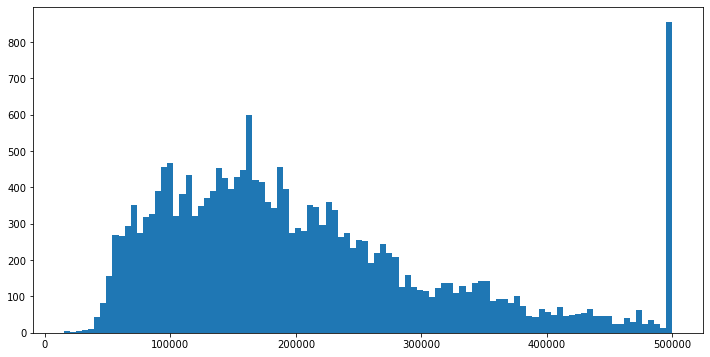

In [10]:
# q4
fig, ax = plt.subplots(figsize=(12,6))
hist = ax.hist(df['MedVal'],bins=100) #crazy density near 500000


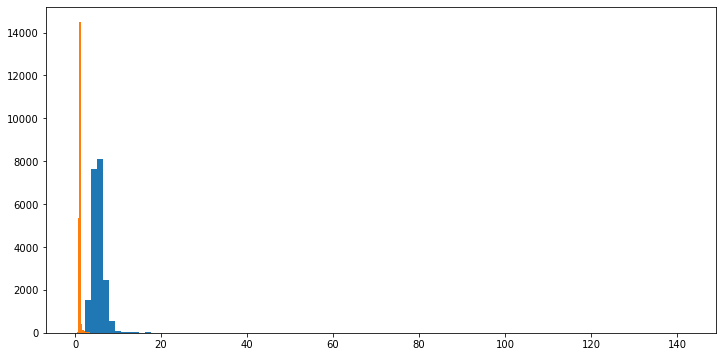

In [95]:
fig, ax = plt.subplots(figsize=(12,6))
hist = ax.hist(df['AveRooms'],bins=100)
hist = ax.hist(df['AveBedrms'],bins=100)
#averooms has a lower max density but a higher mean and variance

In [14]:
#q5
df.groupby('HouseAge')[['price']].mean()


,price
HouseAge,
1.0,144300.000000
2.0,224475.913793
3.0,235643.580645
4.0,229235.136126
5.0,208417.655738
6.0,203794.393750
7.0,193296.034286
8.0,194414.582524
9.0,186672.702439


In [ ]:
#q6 any other insights?

In [44]:
#p2 q1
from yahoofinancials import YahooFinancials as YF
#pip install get-all-tickers anaconda prompt
from get_all_tickers import get_tickers as gt
list_of_tickers = gt.get_tickers()
#len(list_of_tickers)
#data = YF(['AAPL','GOOG']).get_historical_price_data('2020-01-01','2020-10-01','monthly')
type(list_of_tickers[0])

str

In [33]:
df = pd.DataFrame(data['AAPL']['prices'])
df['Symbol'] = 'APPL'
df.columns

Index(['date', 'high', 'low', 'open', 'close', 'volume', 'adjclose',
       'formatted_date', 'Symbol'],
      dtype='object')

In [22]:
data['AAPL'].keys()

dict_keys(['eventsData', 'firstTradeDate', 'currency', 'instrumentType', 'timeZone', 'prices'])

In [57]:
df = pd.DataFrame()

def get_data(ticker):
    dat = YF([ticker]).get_historical_price_data('2020-01-01','2020-10-01','monthly')
    small_df = pd.DataFrame(data[ticker]['prices'])
    small_df['Symbol'] = ticker

for i in ['APPL','MSFT']:
    small = get_data(print('\'%s\''% i ))
    df = df.append(small)
    
df

'APPL'


AttributeError: 'NoneType' object has no attribute 'upper'

In [78]:
import time, sys
from IPython.display import clear_output

def update_progress(progress):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1

    block = int(round(bar_length * progress))

    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)
update_progress(0.5)
#from https://www.mikulskibartosz.name/how-to-display-a-progress-bar-in-jupyter-notebook/

Progress: [##########----------] 50.0%


In [126]:
mini_list = 'fff'#list_of_tickers#[0:11]
yahoo_financials_stocks = YF(mini_list)
stock_data = yahoo_financials_stocks.get_historical_price_data('2020-01-01','2020-10-01','monthly')
big_df = pd.DataFrame()
#c = 0
for i in mini_list:
#    c += 1
#    update_progress(c / len(mini_list)) not working until the end
    try:
        df = pd.DataFrame(stock_data[i]['prices'])
        df['Symbol'] = i
        big_df = big_df.append(df)
    except KeyError:
        try:
            continue
        except AttributeError:
            continue
        
big_df.head()
#try:
#    execute_something()
#except AttributeError:
#    caught_error()

AttributeError: 'NoneType' object has no attribute 'group'

In [81]:
range(len(mini_list))

range(0, 11)

In [112]:
dan_yah_growth = pd.read_csv(r'C:\Users\AlexBushnell\Downloads\Yahoo_Growth.csv')
stocks = dan_yah_growth
stocks.fillna(0, inplace=True)
t10_stocks = stocks.sort_values(by='pct_diff',ascending=False)
t10_stocks =  t10_stocks[0:11]
t10_stocks = list(t10_stocks['Name'])
t10_stocks

['TAPR',
 'XVZ',
 'VXZ',
 'ARKG',
 'BUYZ',
 'VXX',
 'FDG',
 'WUGI',
 'ACES',
 'ARKQ',
 'HELX']

In [113]:
mini_list = t10_stocks
yahoo_financials_stocks = YF(mini_list)
stock_data = yahoo_financials_stocks.get_historical_price_data('2020-01-01','2020-10-01','monthly')
big_df = pd.DataFrame()
#c = 0
for i in mini_list:
#    c += 1
#    update_progress(c / len(mini_list)) not working until the end
    df = pd.DataFrame(stock_data[i]['prices'])
    df['Symbol'] = i
    big_df = big_df.append(df)


In [114]:
#big_df['Monthly_Return'] = 

big_df['Last Close'] = big_df['adjclose'].shift(1)
big_df['Monthly_Return'] = (big_df['adjclose'] - big_df['Last Close'])/big_df['Last Close']
big_df['formatted_date'] = pd.to_datetime(big_df['formatted_date'])
big_df.set_index('formatted_date', inplace=True)

In [115]:
big_df.fillna(method='bfill', inplace=True)
big_df.head()

,date,high,low,open,close,volume,adjclose,Symbol,Last Close,Monthly_Return
formatted_date,,,,,,,,,,
2020-01-01,1577854800,13.650000,10.155000,13.650000,10.155000,20500,10.155000,TAPR,10.155000,-0.272969
2020-02-01,1580533200,11.494000,7.340000,10.410000,7.383000,42900,7.383000,TAPR,10.155000,-0.272969
2020-03-01,1583038800,111.635002,3.910000,7.630000,111.635002,28600,111.635002,TAPR,7.383000,14.120548
2020-04-01,1585713600,98.410004,56.680000,91.044998,65.855003,600,65.855003,TAPR,111.635002,-0.410086
2020-05-01,1588305600,94.544998,66.474998,68.309998,73.500000,900,73.500000,TAPR,65.855003,0.116088


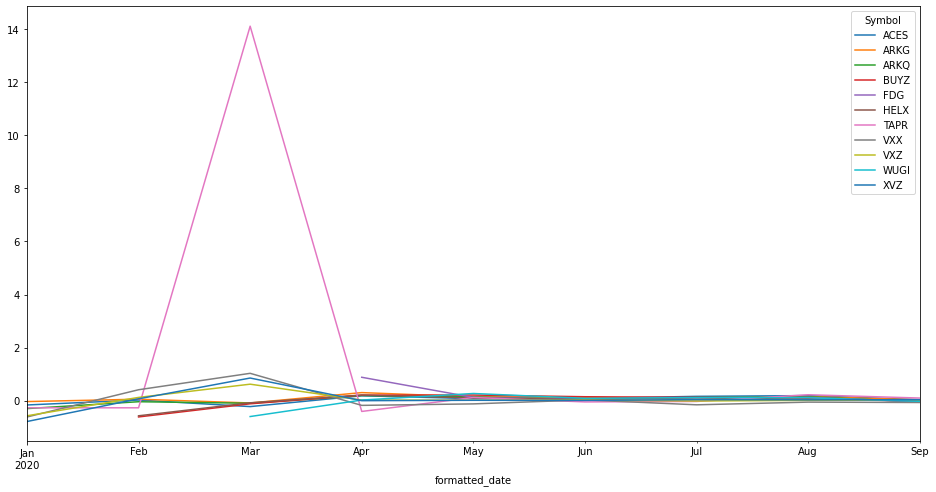

In [120]:
fig, ax = plt.subplots(figsize=(16,8))
big_df.groupby(['formatted_date','Symbol']).sum()['Monthly_Return'].unstack().plot(ax=ax)

In [107]:
big_df.describe()

,date,high,low,open,close,volume,adjclose,Last Close,Monthly_Return
count,3.162000e+03,3162.000000,3162.000000,3162.000000,3162.000000,3.162000e+03,3162.000000,3162.000000,3162.000000
mean,1.588783e+09,39.271288,35.169977,37.273923,37.300052,7.874258e+06,37.023768,37.020844,0.039891
std,6.766401e+06,27.667498,24.364829,25.984503,26.064416,5.497526e+07,25.925926,25.927754,0.467829
min,1.577855e+09,7.770000,3.910000,6.300000,6.410000,0.000000e+00,6.073945,6.073945,-0.874219
25%,1.583039e+09,25.490500,22.964499,24.340000,24.293251,8.387500e+04,24.091949,24.090299,-0.035610
50%,1.588306e+09,28.955000,26.671000,27.770000,27.741000,3.358500e+05,27.608056,27.608056,0.010533
75%,1.593576e+09,46.542500,40.861251,43.757501,44.138000,1.394750e+06,43.619715,43.619715,0.050014
max,1.598933e+09,337.079987,291.890015,326.820007,324.070007,1.437117e+09,324.070007,324.070007,14.120548


In [138]:
big_df['Symbol'].value_counts()

EGHT     18
AMOV     18
GOLD     18
AMBC     18
FDX       9
         ..
AHACU     1
ACTCU     1
AMWL      1
ACND      1
AFGE      1
Name: Symbol, Length: 3079, dtype: int64

In [124]:
'fff' in list_of_tickers

False

In [ ]:
#tick_list = ['fff','AAPL','fff','MSFT']#
import datetime as dt


tick_list = list_of_tickers
big_df = pd.DataFrame()
start = dt.datetime.now()
for i in tick_list:
    yahoo_financials_stocks = YF(i)
    try:
        stock_data = yahoo_financials_stocks.get_historical_price_data('2020-01-01','2020-10-01','monthly')
        df = pd.DataFrame(stock_data[i]['prices'])
        df['Symbol'] = i
        big_df = big_df.append(df)
    except AttributeError:
            continue
    except KeyError:
            continue
end = dt.datetime.now()
print(f'Time taken : {end-start}')
big_df.head()
#there was a timeout error about halfway through (took about an hour to get to where we were)

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


In [ ]:
len(big_df)

In [142]:
import datetime as dt
import time

start = dt.datetime.now()
time.sleep(2)
end = dt.datetime.now()
end - start

datetime.timedelta(seconds=2, microseconds=2182)